# Classification Overview
* Methods overview
* Data preparation and DNN


# Libs

In [3]:
import os
import re
import sys
import pandas as pd
import numpy as np

#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import time   
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (classification_report, confusion_matrix, \
                             roc_curve, roc_auc_score, precision_score, recall_score)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import class_weight

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
 
from fitter import Fitter, get_common_distributions, get_distributions

from collections import Counter
import missingno as mn 
import random
from copy import deepcopy 

from sklearn import ensemble 
from sklearn import tree  
from sklearn import kernel_ridge

from sklearn.preprocessing import scale

from sklearn import linear_model 
from sklearn import decomposition
from sklearn import svm 
import catboost  
import lightgbm 

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score,confusion_matrix, accuracy_score
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection 

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV 

from scipy.stats import pearsonr 
from dtaidistance import dtw, dtw_ndim
from kneed import DataGenerator, KneeLocator
from  sklearn.feature_selection import VarianceThreshold

from statsmodels.tsa.stattools import adfuller 
from scipy.fft import fft, ifft
from IPython.display import display, Markdown, Image

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, TimeDistributed
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.callbacks import History
from tensorflow.keras import callbacks
  
import warnings
warnings.simplefilter("ignore")

In [4]:

FEATURES = ['sensor2',
 'sensor3',
 'sensor4',
 'sensor7',
 'sensor8',
 'sensor9',
 'sensor11',
 'sensor12',
 'sensor13',
 'sensor14',
 'sensor15',
 'sensor17',
 'sensor20',
 'sensor21']

In [5]:
training_file = "c:/weixiuailight/train.csv"
data_train = pd.read_csv(training_file)
data_train["rul"] = data_train.groupby(["Flag","id"])["cycle"].transform("max")-data_train["cycle"]

X_train, X_test, y_train, y_test = train_test_split(data_train[FEATURES], data_train['rul'].values, test_size=0.4)
#X_train = data_train[FEATURES]
#y_train = data_train['rul'].values

In [86]:

from fitter import Fitter, get_common_distributions, get_distributions
distributions = {}
for sensor in sensors:  
    vals = data_train[sensor]
    distr = Fitter(vals,
           distributions= get_common_distributions())
    distr.fit()
    summary = distr.summary()
    distributions[sensor] =summary.reset_index().loc[0][0] 
    


Fitting 10 distributions: 100%|███████████████████████████████████████████████| 10/10 [00:01<00:00,  6.02it/s]


In [91]:
for k, 

{'sensor1': {'mean': 518.67,
  'max': 518.67,
  'min': 518.67,
  'std': 6.537151601226413e-11,
  'distribution': 'cauchy'},
 'sensor2': {'mean': 642.6809335466046,
  'max': 644.53,
  'min': 641.21,
  'std': 0.5000532700606122,
  'distribution': 'gamma'},
 'sensor3': {'mean': 1590.5231186079204,
  'max': 1616.91,
  'min': 1571.04,
  'std': 6.131149519690787,
  'distribution': 'chi2'},
 'sensor4': {'mean': 1408.9337816877514,
  'max': 1441.49,
  'min': 1382.25,
  'std': 9.000604780543735,
  'distribution': 'gamma'},
 'sensor5': {'mean': 14.620000000000001,
  'max': 14.62,
  'min': 14.62,
  'std': 3.3947001929194767e-12,
  'distribution': 'cauchy'},
 'sensor6': {'mean': 21.60980320876352,
  'max': 21.61,
  'min': 21.6,
  'std': 0.0013889849127070525,
  'distribution': 'powerlaw'},
 'sensor7': {'mean': 553.367711211284,
  'max': 556.06,
  'min': 549.85,
  'std': 0.885092257663408,
  'distribution': 'norm'},
 'sensor8': {'mean': 2388.0966516407348,
  'max': 2388.56,
  'min': 2387.9,
  'std'

In [101]:
from scipy import stats
stats.exponpow.rvs(b=2.7, loc=23.289705360864716, scale=.10825087474491232)

23.41613108252757

In [103]:
lists = {}
for k, v in sensor_metadata.items():
    lists[k] = v["distribution"]
lists
    

{'sensor1': 'cauchy',
 'sensor2': 'gamma',
 'sensor3': 'chi2',
 'sensor4': 'gamma',
 'sensor5': 'cauchy',
 'sensor6': 'powerlaw',
 'sensor7': 'norm',
 'sensor8': 'gamma',
 'sensor9': 'cauchy',
 'sensor10': 'cauchy',
 'sensor11': 'gamma',
 'sensor12': 'norm',
 'sensor13': 'lognorm',
 'sensor14': 'cauchy',
 'sensor15': 'gamma',
 'sensor16': 'expon',
 'sensor17': 'gamma',
 'sensor18': 'chi2',
 'sensor19': 'chi2',
 'sensor20': 'exponpow',
 'sensor21': 'exponpow'}

In [105]:
from scipy.optimize import curve_fit


In [113]:
x = np.asarray(data_train["sensor21"])
y = np.asarray(data_train["cycle"]) 
def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c 
popt, pcov = curve_fit(func_powerlaw, x, y, maxfev=200000 )

In [112]:
popt

array([ 1.26204952e-01, -4.62244710e+04,  6.88812276e+04])

In [89]:
sensors = {c:['mean', 'max', 'min', 'std'] for c in list(data_train) if re.match('^sen', c)}
sensor_metadata = data_train.agg(sens).to_dict()
for k,v in sensor_metadata.items():
    sensor_metadata[k]["distribution"] = distributions[k]
sensor_metadata

{'sensor1': {'mean': 518.67,
  'max': 518.67,
  'min': 518.67,
  'std': 6.537151601226413e-11,
  'distribution': 'cauchy'},
 'sensor2': {'mean': 642.6809335466046,
  'max': 644.53,
  'min': 641.21,
  'std': 0.5000532700606122,
  'distribution': 'gamma'},
 'sensor3': {'mean': 1590.5231186079204,
  'max': 1616.91,
  'min': 1571.04,
  'std': 6.131149519690787,
  'distribution': 'chi2'},
 'sensor4': {'mean': 1408.9337816877514,
  'max': 1441.49,
  'min': 1382.25,
  'std': 9.000604780543735,
  'distribution': 'gamma'},
 'sensor5': {'mean': 14.620000000000001,
  'max': 14.62,
  'min': 14.62,
  'std': 3.3947001929194767e-12,
  'distribution': 'cauchy'},
 'sensor6': {'mean': 21.60980320876352,
  'max': 21.61,
  'min': 21.6,
  'std': 0.0013889849127070525,
  'distribution': 'powerlaw'},
 'sensor7': {'mean': 553.367711211284,
  'max': 556.06,
  'min': 549.85,
  'std': 0.885092257663408,
  'distribution': 'norm'},
 'sensor8': {'mean': 2388.0966516407348,
  'max': 2388.56,
  'min': 2387.9,
  'std'

In [125]:
import random

In [126]:
x = random.randint(1,200)
x

144

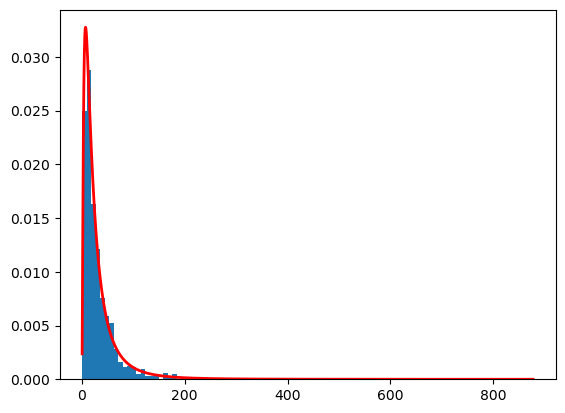

In [23]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')

plt.show()

In [3]:
import pandas as pd
vals = {'sensor1': 518.67, 'sensor2': 644.0817999999999, 'sensor3': 1611.17625, 'sensor4': 1420.4598, 'sensor5': 14.62, 'sensor6': 21.60955, 'sensor7': 551.4025, 'sensor8': 2388.4313, 'sensor9': 9125.3599, 'sensor10': 1.3, 'sensor11': 48.4712, 'sensor12': 522.1606, 'sensor13': 2388.4376, 'sensor14': 8158.074, 'sensor15': 8.582201, 'sensor16': 0.03, 'sensor17': 396.82, 'sensor18': 2388.0, 'sensor19': 100.0, 'sensor20': 38.73985, 'sensor21': 23.198364}
vals = {k:[v] for k, v in vals.items()}
df_val = pd.DataFrame(vals)
 
    

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,518.67,644.0818,1611.17625,1420.4598,14.62,21.60955,551.4025,2388.4313,9125.3599,1.3,...,522.1606,2388.4376,8158.074,8.582201,0.03,396.82,2388.0,100.0,38.73985,23.198364
